# [1] 単純なニューラルネットワークモデルで隠れニューロンの数と学習率を実験してみてください。
※ ここではGoogle Colaraboratoryでの実行を想定しています。

※ Google Colaraboratoryでbashコマンドを実行するには、命令の前に!をつけます。

### （a）モデルからより線形な出力を得るにはどのような変更を行うといいのか確認してください。

In [ ]:
# 回答


In [ ]:
# モデルの隠れ層の値を大きくします。そうすることで、モデルの容量が増えて、より学習データにフィットした出力（線形）に近づきます。
# 以下のコードで確認できます。hidden_numの値を変えて学習を行い、結果のグラフを比較してみてください。

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import numpy as np

In [13]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

In [14]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  9,  7,  1,  6, 10,  0,  4,  3]), tensor([5, 8]))

In [25]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [26]:
hidden_num = 20  # 8を20に

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_num)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_num, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=20, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=20, out_features=1, bias=True)
)

In [27]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
  
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [28]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 232.3825, Validation loss 59.0698
Epoch 1000, Training loss 3.2892, Validation loss 3.8706
Epoch 2000, Training loss 3.5412, Validation loss 0.9357
Epoch 3000, Training loss 2.6783, Validation loss 1.0763
Epoch 4000, Training loss 2.2934, Validation loss 1.2652
Epoch 5000, Training loss 2.1445, Validation loss 1.4218


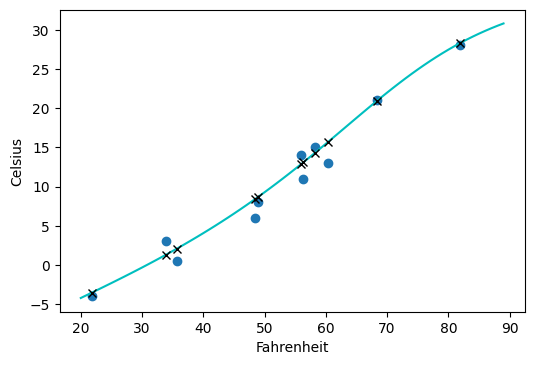

In [29]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

### （b）モデルを明らかな過学習の状態にしてみてください


In [ ]:
# 回答


In [ ]:
# ニューラルネットワークの学習をより長く続け、検証データでの性能が上がり切ってからも学習し続けます

In [45]:
# モデルの用意
hidden_num = 50  # 8を50に

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_num)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_num, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=50, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=50, out_features=1, bias=True)
)

In [46]:
# 訓練関数


def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
  
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            

In [47]:
# 訓練の実施。n_epochsを10倍に 学習率も2倍に
optimizer = optim.SGD(seq_model.parameters(), lr=2*1e-3) 

training_loop(
    n_epochs = 5000*10, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 140.0833, Validation loss 394.6753
Epoch 1000, Training loss 5.0536, Validation loss 14.5071
Epoch 2000, Training loss 3.6903, Validation loss 10.3658
Epoch 3000, Training loss 2.8793, Validation loss 8.2112
Epoch 4000, Training loss 2.3939, Validation loss 7.0406
Epoch 5000, Training loss 2.0966, Validation loss 6.3543
Epoch 6000, Training loss 1.9096, Validation loss 5.9273
Epoch 7000, Training loss 1.7927, Validation loss 5.6535
Epoch 8000, Training loss 1.7240, Validation loss 5.4658
Epoch 9000, Training loss 1.6850, Validation loss 5.3223
Epoch 10000, Training loss 1.6644, Validation loss 5.1928
Epoch 11000, Training loss 1.6531, Validation loss 5.0668
Epoch 12000, Training loss 1.6392, Validation loss 4.9780
Epoch 13000, Training loss 1.6261, Validation loss 4.9171
Epoch 14000, Training loss 1.6145, Validation loss 4.8767
Epoch 15000, Training loss 1.6045, Validation loss 4.8521
Epoch 16000, Training loss 1.5959, Validation loss 4.8400
Epoch 17000, Training

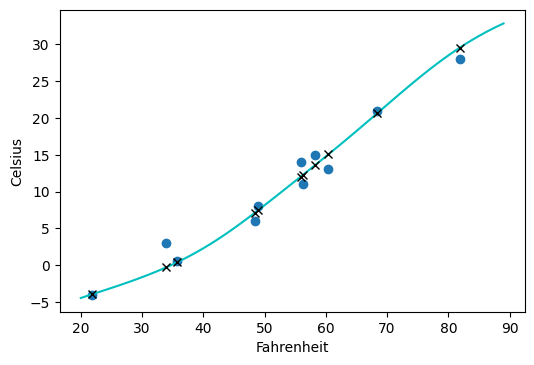

In [48]:
# プロット
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [ ]:
# (a)と同じモデルですが訓練のepoch数を増やすことで、訓練データへの損失は下がり続けますが、検証データへの損失は底を打ち上がり始めます。
# これは過学習の状態です。結果、プロットした関数も線形性が失われ、非線形性がましています。

# [2] 物理学で重要な問題は科学的発見成果を祝う際の適切なワインを見つけることです。第4章で使用したワインのデータを読み込み、適切な数の入力パラメータで新しいモデルを作成します。

### （a）これまで使ってきた温度データと比較して、訓練にどれくらいの時間がかかるのか試してください

In [ ]:
# 回答

In [34]:
# データセットの読み込み
import csv

# GitHubのリポジトリから実行の場合
wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"

# Google Colaboratoryの場合
# /data/p1ch4/tabular-wine/winequality-white.csvを選択・アップロードしてください
# from google.colab import files
# uploade = files.upload()

# wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [35]:
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
skiprows=1)
wineq_numpy.shape

(4898, 12)

In [36]:
# 訓練データと検証データに分割
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [37]:
data = wineq[:, :-1]  # 最後の列以外を選択
target_data = wineq[:, -1]

print('学習データ', data.shape)
print('正解ラベル',target_data.shape)

学習データ torch.Size([4898, 11])
正解ラベル torch.Size([4898])


In [38]:
# データを訓練と検証セットに分割

n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

len(train_indices), len(val_indices)

(3919, 979)

In [39]:
data_train = data[train_indices]
target_data_train = target_data[train_indices].unsqueeze(1)  # ミニバッチの次元を作るためにunsqueeze

data_val = data[val_indices]
target_data_val = target_data[val_indices].unsqueeze(1)  # ミニバッチの次元を作るためにunsqueeze

In [40]:
# モデルの作成
hidden_num = 200

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(11, hidden_num)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_num, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=11, out_features=200, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=200, out_features=1, bias=True)
)

In [41]:
# 訓練関数


def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
  
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            

In [42]:
# 訓練の実施。
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000*10, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = data_train,
    t_u_val = data_val, 
    t_c_train = target_data_train,
    t_c_val = target_data_val)

Epoch 1, Training loss 32.1558, Validation loss 32.3208
Epoch 1000, Training loss 0.6648, Validation loss 0.6047
Epoch 2000, Training loss 0.6418, Validation loss 0.5897
Epoch 3000, Training loss 0.6264, Validation loss 0.5797
Epoch 4000, Training loss 0.6265, Validation loss 0.5798
Epoch 5000, Training loss 0.6216, Validation loss 0.5761
Epoch 6000, Training loss 0.6164, Validation loss 0.5725
Epoch 7000, Training loss 0.6121, Validation loss 0.5684
Epoch 8000, Training loss 0.6084, Validation loss 0.5661
Epoch 9000, Training loss 0.6053, Validation loss 0.5635
Epoch 10000, Training loss 0.6028, Validation loss 0.5615
Epoch 11000, Training loss 0.6007, Validation loss 0.5599
Epoch 12000, Training loss 0.5987, Validation loss 0.5587
Epoch 13000, Training loss 0.5970, Validation loss 0.5577
Epoch 14000, Training loss 0.5955, Validation loss 0.5568
Epoch 15000, Training loss 0.5941, Validation loss 0.5559
Epoch 16000, Training loss 0.5928, Validation loss 0.5553
Epoch 17000, Training los

### （b）訓練時間に差が出た理由はなぜでしょうか？

In [ ]:
# 回答

In [ ]:
# 入力する特徴量が多いため、モデルの各モジュールのパラメータも増えたため

### （c）このデータセットの訓練中に損失を減少させることができることを確認してください

In [ ]:
# 回答

In [ ]:
# (a) の結果を見ると減少が見て取れる

### （d）このデータセットをグラフ化する方法を確認してください

In [ ]:
# 回答

In [43]:
# プロット　total sulfur dioxideでプロットしてみる
total_sulfur_data = data_train[:,6].numpy()


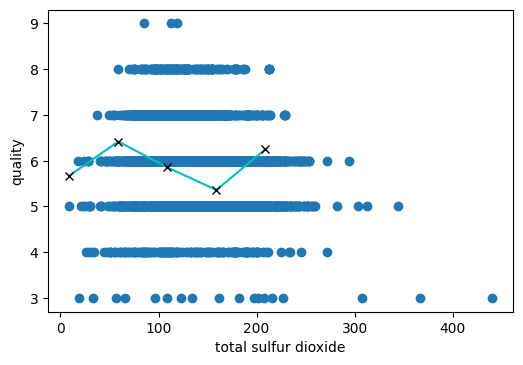

In [44]:
# x軸のレンジ
#t_range = torch.arange(total_sulfur_data.min(), total_sulfur_data.max(), step=50).unsqueeze(1)
t_range = torch.arange(total_sulfur_data.min(), 250, step=50).unsqueeze(1)


fig = plt.figure(dpi=100)
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.plot(total_sulfur_data, target_data_train.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(data_train[:t_range.shape[0],:]).detach().numpy(), 'c-')
plt.plot(t_range.numpy(), seq_model(data_train[:t_range.shape[0],:]).detach().numpy(), 'kx')

In [ ]:
# モデルが良くないので、プロットしてもうまく学習が完了していないことは分かる
# ただ、品質の悪いワインの方が二酸化硫黄の総量（total sulfur dioxide）が多い傾向は見て取れます（第4章と同じ結果）